In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

CSV_FILE = "../../data/data.csv"
employee_data = pd.read_csv(CSV_FILE)

In [2]:
employee_data.head(2)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille


In [3]:
employee_data.shape

(9582, 6)

In [4]:
for col in employee_data.columns:
    print(f"Column: {col}")
    print(f"Data type: {employee_data[col].dtype}")

Column: Entreprise
Data type: object
Column: Metier
Data type: object
Column: Technologies
Data type: object
Column: Diplome
Data type: object
Column: Experience
Data type: object
Column: Ville
Data type: object


In [5]:
employee_data['Experience'] = pd.to_numeric(employee_data['Experience'], errors='coerce')

In [6]:
missing = employee_data.isnull().sum()
percent = (missing / len(employee_data)) * 100
summary = pd.DataFrame({
        'Missing Values': missing,
        'Percent (%)': percent
    })

summary

,Missing Values,Percent (%)
Entreprise,17,0.177416
Metier,19,0.198288
Technologies,0,0.000000
Diplome,0,0.000000
Experience,3814,39.803799
Ville,0,0.000000


In [7]:
categorical_columns = employee_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Colonne : {col}")
    print("Top valeurs :")
    print(employee_data[col].value_counts().head(5))
    print(f"Nombre de valeurs uniques : {employee_data[col].nunique()}")
    print("-" * 40)

Colonne : Entreprise
Top valeurs :
Entreprise
Ball Aerospace                     748
KPMG                               132
Amazon.com                         127
Brigham & Women's Hospital(BWH)    115
Google                             112
Name: count, dtype: int64
Nombre de valeurs uniques : 1382
----------------------------------------
Colonne : Metier
Top valeurs :
Metier
Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: count, dtype: int64
Nombre de valeurs uniques : 4
----------------------------------------
Colonne : Technologies
Top valeurs :
Technologies
SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           250
Name: count, dtype: int64
Nombre de valeurs uniques : 57
---------------

# Descriptive analysis

## 1. Décrivez la variable Expérience (moyenne, médiane, écart-type, minimum, maximum) puis développez une rapide analyse pour expliquer ces valeurs dans ce contexte.

In [8]:
# Statistiques descriptives pour la variable "Experience"
exp = employee_data['Experience']
mean_exp = np.mean(exp)
median_exp = np.nanmedian(exp)
std_exp = np.std(exp)
min_exp = np.min(exp)
max_exp = np.max(exp)

print(f"Moyenne : {mean_exp:.2f}")
print(f"Médiane : {median_exp:.2f}")
print(f"Écart-type : {std_exp:.2f}")
print(f"Minimum : {min_exp}")
print(f"Maximum : {max_exp}")


Moyenne : 3.35
Médiane : 3.00
Écart-type : 3.26
Minimum : 0.0
Maximum : 21.0


Le jeu de données représente un ensemble de 9582 individus.
Chaque individu est décrit par un métier (Métier) exercé dans une entreprise (Entreprise).
Chaque individu est décrit par un diplome (Diplome) et une maîtrise d'un ensemble de technologies (Technologies) et est localisé dans une ville (Ville)

## 2. Proposez une visualisation qui permet de comparer la répartition de la variable Expérience en fonction de la variable Métier.

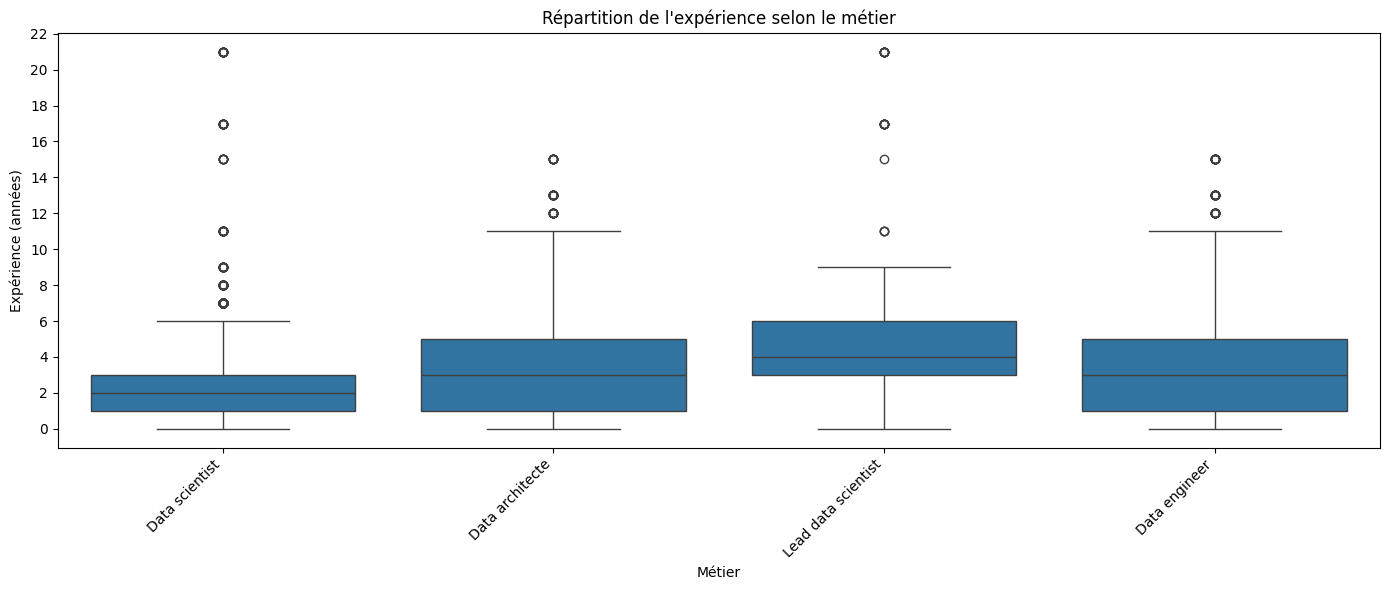

In [9]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Metier", y="Experience", data=employee_data)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, employee_data['Experience'].max() + 2, 2), ha='right')
plt.title("Répartition de l'expérience selon le métier")
plt.xlabel("Métier")
plt.ylabel("Expérience (années)")
plt.tight_layout()
plt.show()

In [10]:

metiers = employee_data['Metier'].unique()
resultats = []

for metier in metiers:
    vals = employee_data.loc[employee_data['Metier'] == metier, 'Experience'].dropna()
    total = len(vals)
    if total == 0:
        continue
    q1 = np.percentile(vals, 25)
    q3 = np.percentile(vals, 75)
    median = np.median(vals)
    iqr = q3 - q1
    lower_whisker = max(vals[vals >= q1 - 1.5 * iqr].min(), vals.min())
    upper_whisker = min(vals[vals <= q3 + 1.5 * iqr].max(), vals.max())
    outliers = vals[(vals < lower_whisker) | (vals > upper_whisker)]
    min_val = vals.min()
    max_val = vals.max()
    mean_val = vals.mean()
    
    percent_outliers = (len(outliers) / total) * 100 
    
    resultats.append({
        'Metier': metier,
        'Min': min_val,
        'Q1': q1,
        'Moyenne': mean_val,
        'Médiane': median,
        'Q3': q3,
        'Tige basse': lower_whisker,
        'Tige haute': upper_whisker,
        'Max': max_val,
        'Nb outliers': len(outliers),
        'Total': total,
        'Pourcentage outliers (%)': percent_outliers,
    })

boxplots_data = pd.DataFrame(resultats)

boxplots_data

,Metier,Min,Q1,Moyenne,Médiane,Q3,Tige basse,Tige haute,Max,Nb outliers,Total,Pourcentage outliers (%)
0,Data scientist,0.0,1.0,2.677448,2.0,3.0,0.0,6.0,21.0,234,2226,10.512129
1,Data architecte,0.0,1.0,3.482116,3.0,5.0,0.0,11.0,15.0,54,1342,4.023845
2,Lead data scientist,0.0,3.0,4.818432,4.0,6.0,0.0,9.0,21.0,21,727,2.888583
3,Data engineer,0.0,1.0,3.536619,3.0,5.0,0.0,11.0,15.0,62,1461,4.243669


L'observation de ces boxplots montre qu'une grande partie des data scientists ont entre 1 et 3 ans d'expérience avec une médiane centrée autour de 2 ans, tandis que les lead data scientist se situent en majorité entre 3 et 6 ans d'expérience avec une médiane autour de 4 ans.
Beaucoup de profils de data scientists (234 sur 2226 soit 10%) sont des outliers en terme d'expérience, tandis que pour les lead data scientists il y en a beaucoup moins.

Les Data engineers sont des profils majoritairement situés entre 1 et 5 ans d'expérience, avec une médiane a 3 ans et 62 data engineers sur 1461 soit 4%

Les Data architects ont majoritairement entre 1 et 5 années d'expérience avec une médiane autour de 3 années et les plus expérimentés ont entre 11 et 15 ans d'expérience, avec 4% d'outliers.

## 3. Proposez une approche pour gérer les valeurs manquantes de la variable Expérience.

Les employés n'ayant pas renseigné la variable Experience auront par défaut la médiane associée a leur métier. En effet, les distributions d'experience en fonction des métiers sont différentes c'est pourquoi on choisit de le faire par métier et on choisit la médiane car elle est plus robuste aux outliers. 

## 4. Quelles sont les 5 technologies les plus couramment utilisées ? Proposez une visualisation.

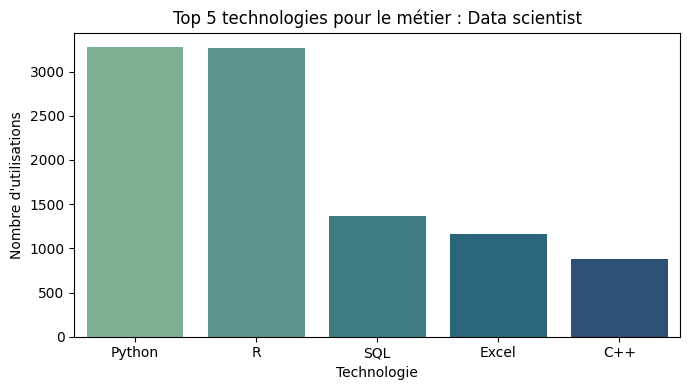

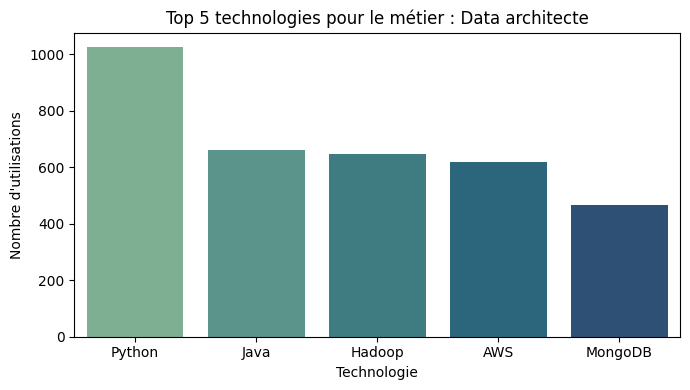

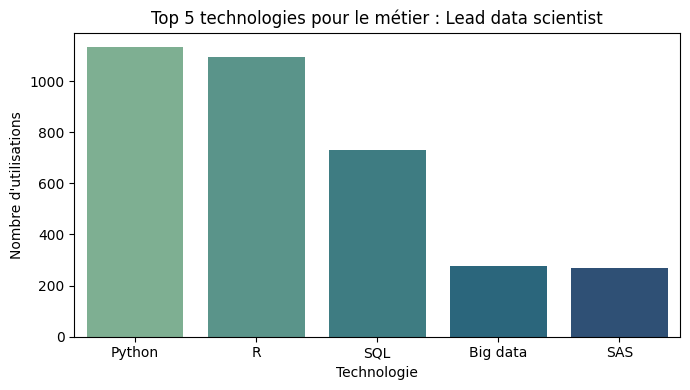

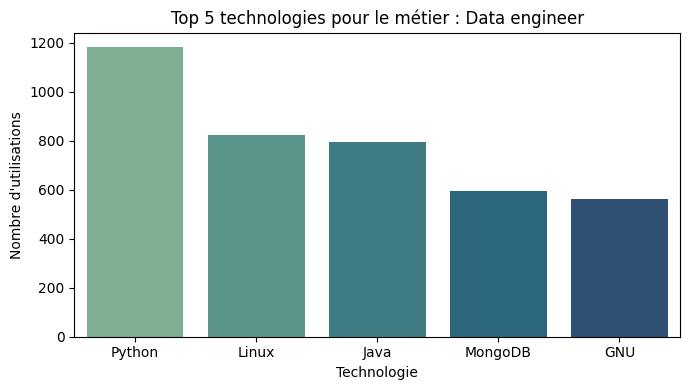

In [11]:
# Top 5 technologies par métier

from collections import Counter

metiers = employee_data['Metier'].dropna().unique()
top_techs_by_metier = {}

for metier in metiers:
    techs = employee_data.loc[employee_data['Metier'] == metier, 'Technologies'].dropna()
    all_techs = []
    for t in techs:
        all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
    counter = Counter(all_techs)
    top_techs_by_metier[metier] = counter.most_common(5)

# Affichage et visualisation pour chaque métier
for metier, top_techs in top_techs_by_metier.items():
    tech_names, tech_counts = zip(*top_techs) if top_techs else ([], [])
    plt.figure(figsize=(7, 4))
    sns.barplot(x=list(tech_names), y=list(tech_counts), hue = list(tech_names),  palette="crest")
    plt.title(f"Top 5 technologies pour le métier : {metier}")
    plt.ylabel("Nombre d'utilisations")
    plt.xlabel("Technologie")
    plt.tight_layout()
    plt.show()

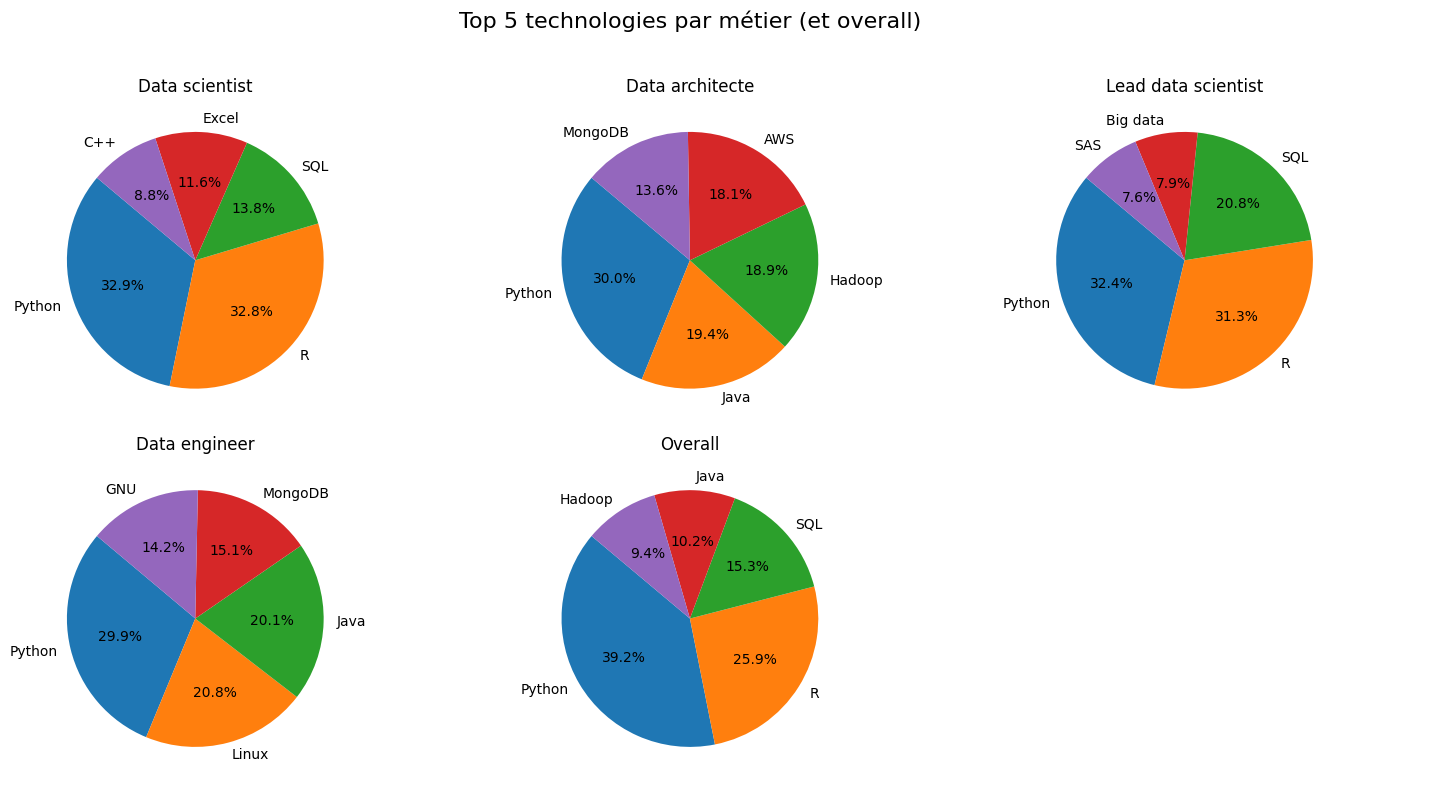

In [12]:
# Top 5 technologies par métier + overall, en camembert (pie chart) avec subplots

from collections import Counter

metiers = employee_data['Metier'].dropna().unique()
top_techs_by_metier = {}

# Calcul des top 5 par métier
for metier in metiers:
    techs = employee_data.loc[employee_data['Metier'] == metier, 'Technologies'].dropna()
    all_techs = []
    for t in techs:
        all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
    counter = Counter(all_techs)
    top_techs_by_metier[metier] = counter.most_common(5)

# Calcul des top 5 overall
all_techs = []
for t in employee_data['Technologies'].dropna():
    all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
overall_counter = Counter(all_techs)
overall_top5 = overall_counter.most_common(5)
top_techs_by_metier['Overall'] = overall_top5

# Préparation des subplots
n_metiers = len(top_techs_by_metier)
ncols = 3
nrows = int(np.ceil(n_metiers / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))

axes = axes.flatten()

for idx, (metier, top_techs) in enumerate(top_techs_by_metier.items()):
    tech_names, tech_counts = zip(*top_techs) if top_techs else ([], [])
    axes[idx].pie(tech_counts, labels=tech_names, autopct='%1.1f%%', startangle=140)
    axes[idx].set_title(f"{metier}")

# Masquer les axes inutilisés
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Top 5 technologies par métier (et overall)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Feature Engineering

## 1. Transformez la variable Expérience en variable catégorielle ayant ces 4 modalités : débutant, confirmé, senior et expert. Expliquez votre démarche.

In [13]:
# Regrouper les métiers
employee_data['Metier_Grouped'] = employee_data['Metier'].replace({
    'Lead data scientist': 'Data scientist',
    'Data scientist': 'Data scientist'
})

# Fonction de catégorisation
def categorize_experience(row, quartiles_dict):
    metier = row['Metier_Grouped']
    exp = row['Experience']
    if pd.isnull(exp) or metier not in quartiles_dict:
        return np.nan
    q = quartiles_dict[metier]
    if exp < q['Q1']:
        return 'débutant'
    elif exp < q['Q2']:
        return 'confirmé'
    elif exp < q['Q3']:
        return 'senior'
    else:
        return 'expert'

# Calcul des quartiles par métier
quartiles_dict = {}
for metier in employee_data['Metier_Grouped'].unique():
    vals = employee_data.loc[employee_data['Metier_Grouped'] == metier, 'Experience'].dropna()
    if len(vals) == 0:
        continue
    quartiles_dict[metier] = {
        'min': vals.min(),
        'Q1': np.percentile(vals, 25),
        'Q2': np.percentile(vals, 50),
        'Q3': np.percentile(vals, 75),
        'max': vals.max()
    }

# Application de la catégorisation
employee_data['Experience_Category'] = employee_data.apply(lambda row: categorize_experience(row, quartiles_dict), axis=1)
employee_data['Experience_Category'].fillna('Non renseigné', inplace=True)

employee_data.drop(columns=['Metier_Grouped'], inplace=True)


employee_data.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Experience_Category
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,confirmé
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,senior
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,senior
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,NaN,Marseille,Non renseigné
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux,Non renseigné


In [14]:
employee_data['nb_technos'] = employee_data['Technologies'].apply(lambda x: len(x.split('/')) if isinstance(x, str) else 0)

On a utilisé les intervalles fournis par les quantiles des boxplots associés a chaque métier. On a regroupé data scientist et lead data scientist.

## 2. Pour chaque variable qui vous semble pertinente pour les étapes suivantes, proposez une stratégie de feature engineering et justifiez votre choix.

On commence par split le dataset avant de commencer le feature engineering afin d'éviter le leak de données.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

employee_data_for_split = employee_data.dropna(subset=['Metier'])

X_train, X_test, y_train, y_test = train_test_split(
    employee_data_for_split.drop(columns=['Metier']),
    employee_data_for_split['Metier'],
    test_size=0.2,
    random_state=42,
    stratify=employee_data_for_split['Metier']
)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder(target_type='multiclass', smooth= 'auto')

entreprise_encoded_train = target_encoder.fit_transform(
    X_train[["Entreprise"]], 
    y_train
)

entreprise_encoded_test = target_encoder.fit_transform(
    X_test[["Entreprise"]],
    y_test
)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# On définit le vectorizer en précisant le séparateur
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split('/'))

technologies_encoded_train = tfidf.fit_transform(X_train["Technologies"])
technologies_encoded_test = tfidf.transform(X_test["Technologies"])

In [41]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['No diploma', 'Bachelor', 'Master', 'Phd']]

ordinal_encoder = OrdinalEncoder(categories=categories)

diplome_encoded_train = ordinal_encoder.fit_transform(
    X_train[['Diplome']]
)

diplome_encoded_test = ordinal_encoder.fit_transform(
    X_test[['Diplome']]
)

In [42]:
target_encoder = TargetEncoder(target_type='multiclass', smooth= 'auto')

ville_encoded_train = target_encoder.fit_transform(
    X_train[["Ville"]], 
    y_train
)

ville_encoded_test = target_encoder.fit_transform(
    X_test[["Ville"]],
    y_test
)

In [43]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

experience_imputed_train = median_imputer.fit_transform(
    X_train[['Experience']]
)
experience_imputed_test = median_imputer.transform(
    X_test[['Experience']]
)


On en fait un Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        # Imputation de l'expérience
        ('exp_imputer', median_imputer, ['Experience']),
        # Ordinal encoding du diplôme
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        # TFIDF sur Technologies
        ('tech_tfidf', tfidf, 'Technologies'),
        # Target encoding sur Entreprise
        ('entreprise_target', target_encoder, ['Entreprise']),
        # Target encoding sur Ville
        ('ville_target', target_encoder, ['Ville']),
    ],
    remainder='drop'  # ou 'passthrough' si tu veux garder d'autres colonnes
)

# 3. Pipeline complet avec un modèle (exemple RandomForest)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 4. Exemple d'entraînement
pipeline.fit(X_train, y_train)

# 5. Prédiction
y_pred = pipeline.predict(X_test)

Accuracy: 0.905906952430737
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       425
           1       1.00      1.00      1.00       469
           2       0.85      0.94      0.89       773
           3       0.72      0.48      0.58       246

    accuracy                           0.91      1913
   macro avg       0.89      0.85      0.86      1913
weighted avg       0.90      0.91      0.90      1913



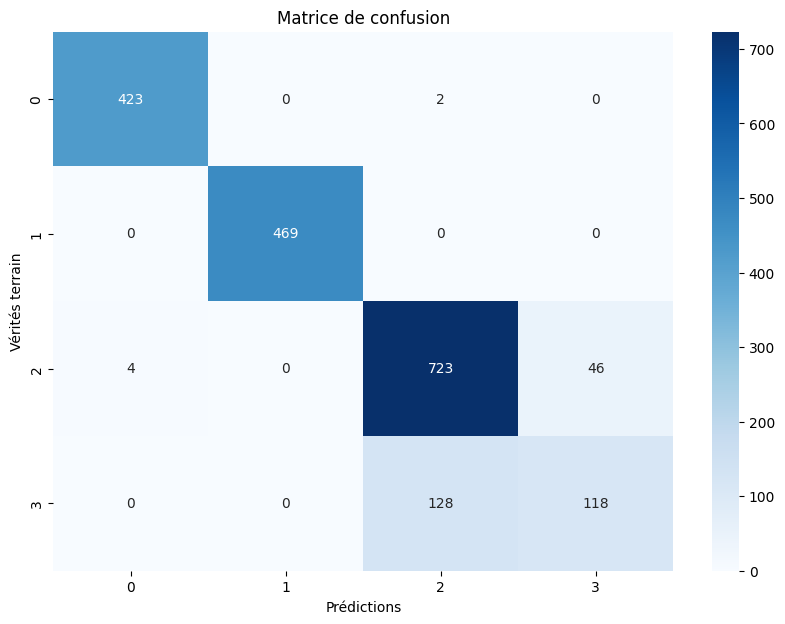

In [45]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# 6. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d’hyperparamètres
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Création du GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

# Lancement de la recherche
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score de validation croisée :", grid_search.best_score_)

Accuracy: 0.9027705175117616
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.84      0.94      0.89       773
           3       0.74      0.44      0.55       246

    accuracy                           0.90      1913
   macro avg       0.89      0.84      0.86      1913
weighted avg       0.90      0.90      0.89      1913



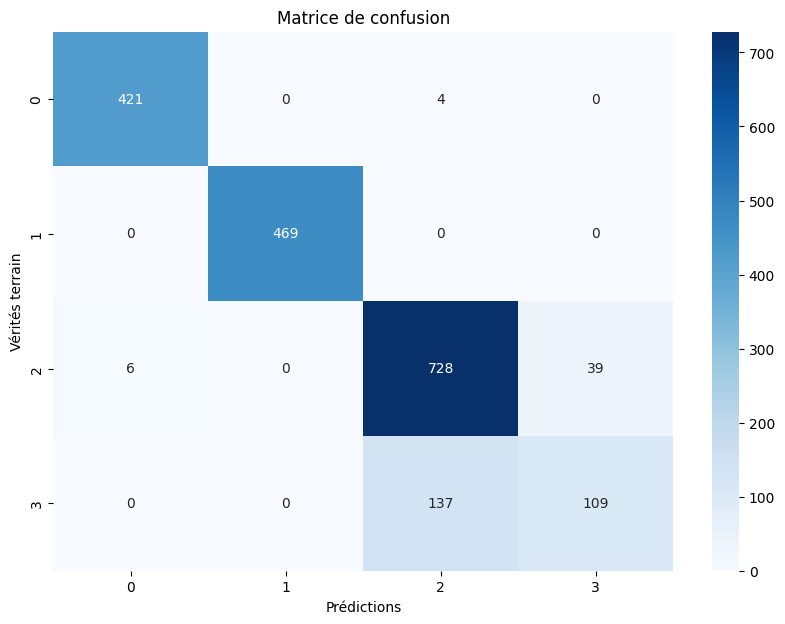

In [47]:
grid_search.best_estimator_

# Prédiction avec le meilleur modèle

y_pred_best = grid_search.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [48]:
from xgboost import XGBClassifier

preprocessor = ColumnTransformer(
    transformers=[
        # Imputation de l'expérience
        ('exp_imputer', median_imputer, ['Experience']),
        # Ordinal encoding du diplôme
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        # TFIDF sur Technologies
        ('tech_tfidf', tfidf, 'Technologies'),
        # Target encoding sur Entreprise
        ('entreprise_target', target_encoder, ['Entreprise']),
        # Target encoding sur Ville
        ('ville_target', target_encoder, ['Ville']),
    ],
    remainder='drop'  # ou 'passthrough' si tu veux garder d'autres colonnes
)

# 3. Pipeline complet avec un modèle (exemple RandomForest)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier())
])

# 4. Exemple d'entraînement
pipeline.fit(X_train, y_train)

# 5. Prédiction
y_pred = pipeline.predict(X_test)

Accuracy: 0.8944066910611604
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.85      0.90      0.87       773
           3       0.63      0.52      0.57       246

    accuracy                           0.89      1913
   macro avg       0.87      0.85      0.86      1913
weighted avg       0.89      0.89      0.89      1913



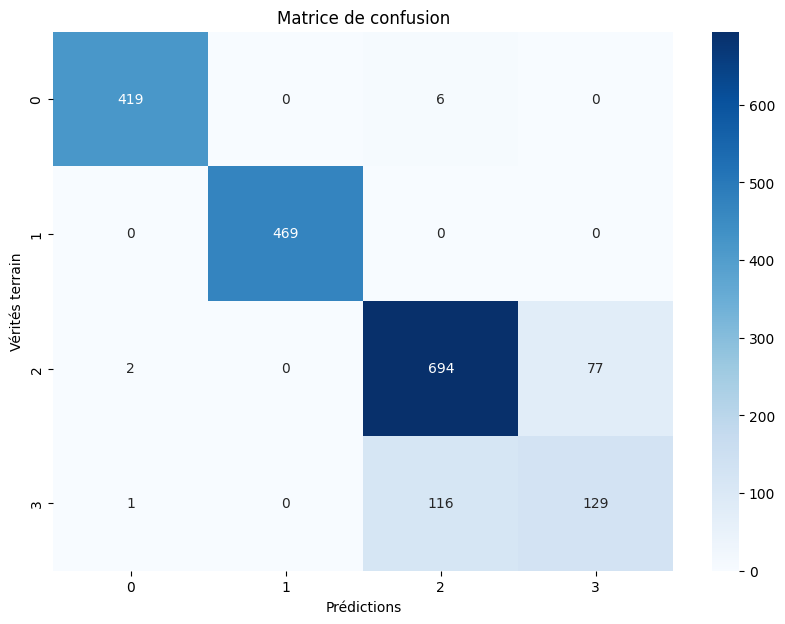

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [59]:
X_train

,Entreprise,Technologies,Diplome,Experience,Ville,Experience_Category,nb_technos
9094,Jacobs,MongoDB/SQL/Docker,Master,NaN,Marseille,Non renseigné,3
6141,Cambridge Consultants Ltd,Java/Hadoop/HDFS/Yarn,No diploma,NaN,Nantes,Non renseigné,4
1910,The Laso Corp,VBA/Python/Excel/R,Master,2.0,Bordeaux,senior,4
4127,Allstate,Matlab/C/C++/Python/Scikit-learn,Phd,NaN,Paris,Non renseigné,5
3245,Ball Aerospace,Java/Hadoop/HDFS/Yarn,Master,1.0,Lyon,confirmé,4
...,...,...,...,...,...,...,...
6287,Ball Aerospace,Spark/Python/Scala,No diploma,0.0,Lyon,débutant,3
3476,Conversant Media,MariaDB/MongoDB/NoSQ/SQL/Hadoop/Hive,No diploma,NaN,Paris,Non renseigné,6
6012,University of Colorado Boulder,Docker/GNU/Windows/Linux/Python,Master,0.0,Bordeaux,débutant,5
604,National Ecological Observatory Network Inc,Java/AWS/Elasticsearch/Kibana,Master,NaN,Paris,Non renseigné,4


In [ ]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# ... Assure-toi que median_imputer, ordinal_encoder, tfidf, target_encoder sont définis ...

preprocessor = ColumnTransformer(
    transformers=[
        ('exp_imputer', median_imputer, ['Experience']),
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        ('tech_tfidf', tfidf, 'Technologies'),
        ('entreprise_target', target_encoder, ['Entreprise']),
        ('ville_target', target_encoder, ['Ville']),
    ],
    remainder='passthrough' 
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier())
])

# Définition de l'espace de recherche
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': range(3, 10),
    'classifier__colsample_bytree': [0.5, 0.7, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

grid = RandomizedSearchCV(
    pipeline,
    param_distributions=search_space,
    n_iter=150,
    cv=10,
    scoring='f1_weighted',
    verbose=0,
    n_jobs=-1
)

# Entraînement
model = grid.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-pa

Accuracy: 0.9137480397281756
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.88      0.91      0.90       773
           3       0.71      0.63      0.67       246

    accuracy                           0.91      1913
   macro avg       0.89      0.88      0.89      1913
weighted avg       0.91      0.91      0.91      1913



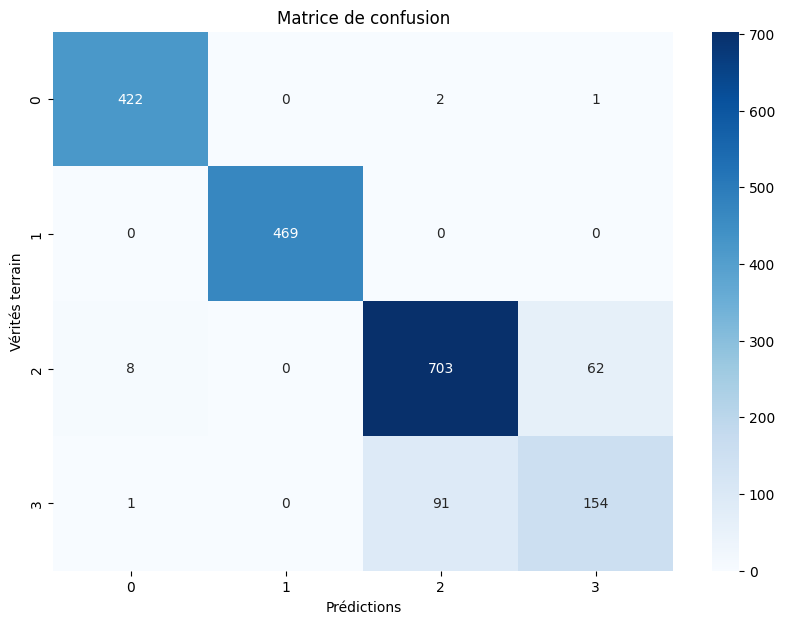

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()